In [1]:
import numpy as np
# (a) Read graph from mtx file and create edge_list
def create_network_from_mtx(file_path):
    with open(file_path, 'r') as file:
        for line in file:
            if line[0] != '%':
                dimensions = line.strip().split()
                break
    num_nodes = int(dimensions[0])
    edge_list = []
    with open(file_path, 'r') as file:
        reading_edges = False
        for line in file:
            if line[0] == '%':
                continue
            elif not reading_edges:
                reading_edges = True
                continue
            node1, node2 = [int(x) - 1 for x in line.strip().split()[:2]]  # Starting and ending node
            if node1 != node2:  # Ignoring self-edges
                edge_list.append((node1, node2))
    return num_nodes, edge_list

# Create adjacency_matrix from edge_list obtained
def adj_matrix(num_nodes, edge_list):
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for edge in edge_list:
        node1, node2 = edge
        adjacency_matrix[node1, node2] = 1
    return adjacency_matrix

# (c) Comment on sparseness
def calculate_sparseness_directed(adjacency_matrix):
    total_edges = np.sum(adjacency_matrix)
    # total no of edges possible = N(N-1) for a directed graph
    possible_edges = (len(adjacency_matrix) * (len(adjacency_matrix) - 1))
    sparseness = total_edges / possible_edges
    return sparseness

# (d) Calculate vectors of in-degree and out-degree
def calc_degrees(num_nodes, adjacency_matrix):
    in_degrees = np.zeros(num_nodes, dtype=int)
    out_degrees = np.zeros(num_nodes, dtype=int)
    for i in range(len(adjacency_matrix)):
        in_degree = 0
        for j in adjacency_matrix[i]:
            in_degree += j
        in_degrees[i] = in_degree
    for j in range(len(adjacency_matrix)):
        out_degree = 0
        for i in range(len(adjacency_matrix)):
            out_degree += adjacency_matrix[i][j]
        out_degrees[j] = out_degree
    return in_degrees, out_degrees

# (a) Read graph from mtx file and create edge_list
file_path = 'power-494-bus.mtx'  # mtx file contains a list of pair of starting and ending nodes (directed unweighted graph)
num_nodes, edge_list = create_network_from_mtx(file_path)
print("part a)")
print(f"No of nodes = {num_nodes}")
print(f"No of edges = {len(edge_list)}")
adjacency_matrix = adj_matrix(num_nodes, edge_list)

# (c) Comment on sparseness
print("part c)")
sparseness = calculate_sparseness_directed(adjacency_matrix)
print("The following parameters can be used to estimate the sparseness of a network. A big clustering co-efficient and an average in-degree/out-degree being close to (N-1) nodes can denote a dense network and it can be considered sparse in other cases.")
print(f" It can be observed that the graph is sparse because only {sparseness*100}% of the possible edges are actually present in the graph.")

# (d) Compute in-degree and out-degree
print("part d)")
in_degrees, out_degrees = calc_degrees(num_nodes, adjacency_matrix)
print(f"Avg in-degree = {np.mean(in_degrees)}")
print(f"Avg out-degree = {np.mean(out_degrees)}")
print(f"Avg degree = {np.mean(in_degrees)+np.mean(out_degrees)}")

part a)
No of nodes = 494
No of edges = 586
part c)
The following parameters can be used to estimate the sparseness of a network. A big clustering co-efficient and an average in-degree/out-degree being close to (N-1) nodes can denote a dense network and it can be considered sparse in other cases.
 It can be observed that the graph is sparse because only 0.2406155817066461% of the possible edges are actually present in the graph.
part d)
Avg in-degree = 1.1862348178137652
Avg out-degree = 1.1862348178137652
Avg degree = 2.3724696356275303


In [2]:
import matplotlib.pyplot as plt

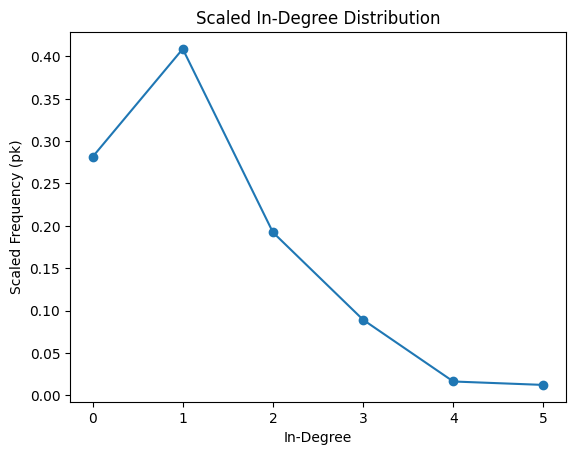

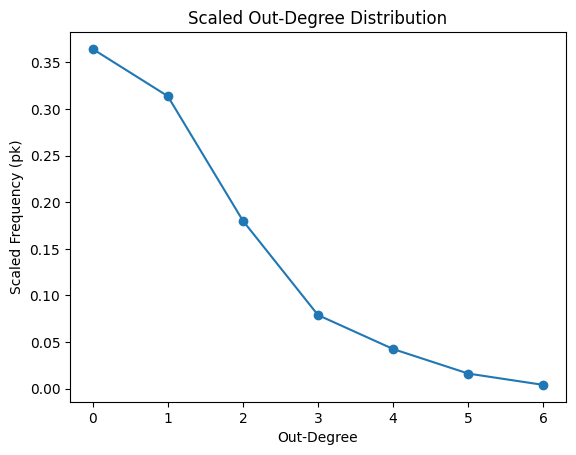

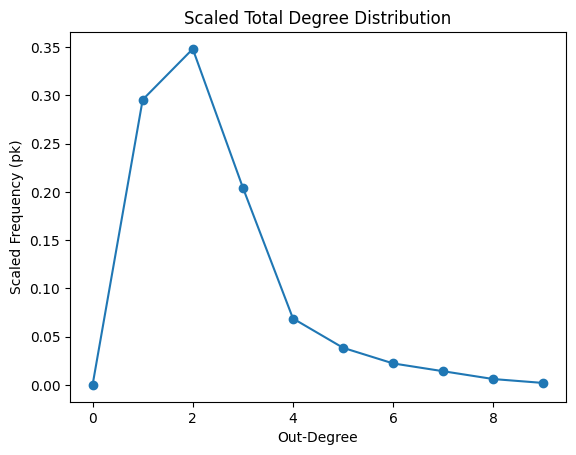

In [6]:
degree_counts = np.bincount(in_degrees)
scaled_distribution = degree_counts / num_nodes
plt.plot(np.arange(len(scaled_distribution)), scaled_distribution, marker='o')
plt.xlabel("In-Degree")
plt.ylabel("Scaled Frequency (pk)")
plt.title("Scaled In-Degree Distribution")
plt.savefig("scaled_in_degree.png")
plt.show()
print()
degree_counts = np.bincount(out_degrees)
scaled_distribution = degree_counts / num_nodes
plt.plot(np.arange(len(scaled_distribution)), scaled_distribution, marker='o')
plt.xlabel("Out-Degree")
plt.ylabel("Scaled Frequency (pk)")
plt.title("Scaled Out-Degree Distribution")
plt.savefig("scaled_out_degree.png")
plt.show()
print()
degree_counts = np.bincount(in_degrees+out_degrees)
scaled_distribution = degree_counts / num_nodes
plt.plot(np.arange(len(scaled_distribution)), scaled_distribution, marker='o')
plt.xlabel("Out-Degree")
plt.ylabel("Scaled Frequency (pk)")
plt.title("Scaled Total Degree Distribution")
plt.savefig("scaled_total_degree.png")
plt.show()

P.S. The graphs generated may not be entirely visible in the pdf, kindly refer to the PNG files.

In [8]:
def average_path_length(adj_matrix):
    n = len(adj_matrix)
    total_path_length = 0
    num_pairs = 0

    for i in range(n):
        for j in range(n):
            if i != j:  # Exclude self-pairs
                path_length = bfs(adj_matrix, i, j)
                total_path_length += path_length
                num_pairs += 1

    return total_path_length / num_pairs

def bfs(adj_matrix, start, end):
    queue = [(start, 0)]  # (node, distance)
    visited = set()

    while queue:
        node, distance = queue.pop(0)
        visited.add(node)

        if node == end:
            return distance

        for neighbor in range(len(adj_matrix)):
            if adj_matrix[node][neighbor] == 1 and neighbor not in visited:
                queue.append((neighbor, distance + 1))

    # return float('inf')  # if no path found means path length = inf this would return avg path length to be infinity in sparse graphs
    return 0  #for avg path length to be a definite number

apl = average_path_length(adjacency_matrix)
print(f"Average Path Length: {apl:.3f}")


Average Path Length: 0.018


In [9]:
def diameter(adj_matrix):
    max_path_length = 0

    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if i != j:
                path_length = bfs(adj_matrix, i, j)
                max_path_length = max(max_path_length, path_length)

    return max_path_length

d = diameter(adjacency_matrix)
print(f"Diameter: {d}")


Diameter: 9


In [15]:
def local_clustering_coefficient(adj_matrix, node):
    neighbors = [i for i, val in enumerate(adj_matrix[node]) if val == 1]
    num_neighbors = len(neighbors)

    if num_neighbors < 2:
        return 0  # Avoid division by zero

    num_connected_pairs = 0

    for i in range(num_neighbors):
        for j in range(i + 1, num_neighbors):
            if adj_matrix[neighbors[i]][neighbors[j]] == 1:
                num_connected_pairs += 1

    return 2 * num_connected_pairs / (num_neighbors * (num_neighbors - 1))

def average_clustering_coefficient(adj_matrix):
    total_coefficient = 0
    num_nodes = len(adj_matrix)

    for node in range(num_nodes):
        total_coefficient += local_clustering_coefficient(adj_matrix, node)

    return total_coefficient / num_nodes

acc = average_clustering_coefficient(adjacency_matrix)
print(f"Average Clustering Coefficient: {acc:.12f}")

Average Clustering Coefficient: 0.000000000000
